In [34]:
import numpy as np
import scipy.constants as const
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
from scipy.ndimage import gaussian_filter1d
%matplotlib inline
from scipy.optimize import curve_fit
import matplotlib.dates as mdates
import datetime 
import time

In [35]:
response_time = [2,1.5,1.87,2.5,3,2.8,3.5,2.5,3,4,5,6,7.5,8,7.75,8,8,11,9,11]
dates = [datetime.datetime(2021, 2, 16), #2
        datetime.datetime(2021, 3, 30),# 1:30
        datetime.datetime(2021, 3, 30), #1.47
        datetime.datetime(2021, 4, 8), # 2.5
        datetime.datetime(2021, 4, 8), # 3
        datetime.datetime(2021, 4, 8), # 2.8
        datetime.datetime(2021, 4, 22), #3.5
        datetime.datetime(2021, 4, 22), #2.5
        datetime.datetime(2021, 4, 22), #3
        datetime.datetime(2021, 4, 22), #4
        datetime.datetime(2021, 7, 2), #5
        datetime.datetime(2021, 7, 2), #6
        datetime.datetime(2021, 7, 13), # 7.5
        datetime.datetime(2021, 7, 13), # 8
        datetime.datetime(2021, 7, 13), # 7.75
        datetime.datetime(2021, 7, 13), # 8
        datetime.datetime(2021, 7, 13), # 8
        datetime.datetime(2021, 7, 13), # 11
        datetime.datetime(2021, 7, 13), # 9
        datetime.datetime(2021, 7, 13),] # 11

In [36]:
Sensor_Resistances =  [82.2,84.9,71.8,73.0,62.4,55.2,81.9,64.4,43.4,52.2,48.9,28.9]
R_dates = [datetime.datetime(2021, 3, 22),
          datetime.datetime(2021, 3, 22),
          datetime.datetime(2021, 3, 22),
          datetime.datetime(2021, 3, 22),
          datetime.datetime(2021, 3, 22),
          datetime.datetime(2021, 3, 22),
          datetime.datetime(2021, 3, 22),
          datetime.datetime(2021, 3, 22),
          datetime.datetime(2021, 3, 22),
          datetime.datetime(2021, 3, 22),
          datetime.datetime(2021, 3, 22),
          datetime.datetime(2021, 3, 22)]
Sensor_Resistances_TD = [1000,483,800,1200,1500,700]
R_dates_TD = [datetime.datetime(2021, 7, 30),
          datetime.datetime(2021, 7, 30),
          datetime.datetime(2021, 7, 30),
          datetime.datetime(2021, 7, 30),
          datetime.datetime(2021, 7, 30),
          datetime.datetime(2021, 7, 30)] 
Sensor_Resistances = Sensor_Resistances + Sensor_Resistances_TD
R_dates = R_dates + R_dates_TD

In [37]:
x = mdates.date2num(dates)
z4 = np.polyfit(x, response_time, 2)
p4 = np.poly1d(z4)
xx = np.linspace(x.min(), x.max(), 100)
dates_line = mdates.num2date(xx)

In [40]:
x_R = mdates.date2num(R_dates)
R_z4 = np.polyfit(x_R, Sensor_Resistances, 1)
R_p4 = np.poly1d(R_z4)
xx_R = np.linspace(x_R.min(), x_R.max(), 100)
R_dates_line = mdates.num2date(xx_R)

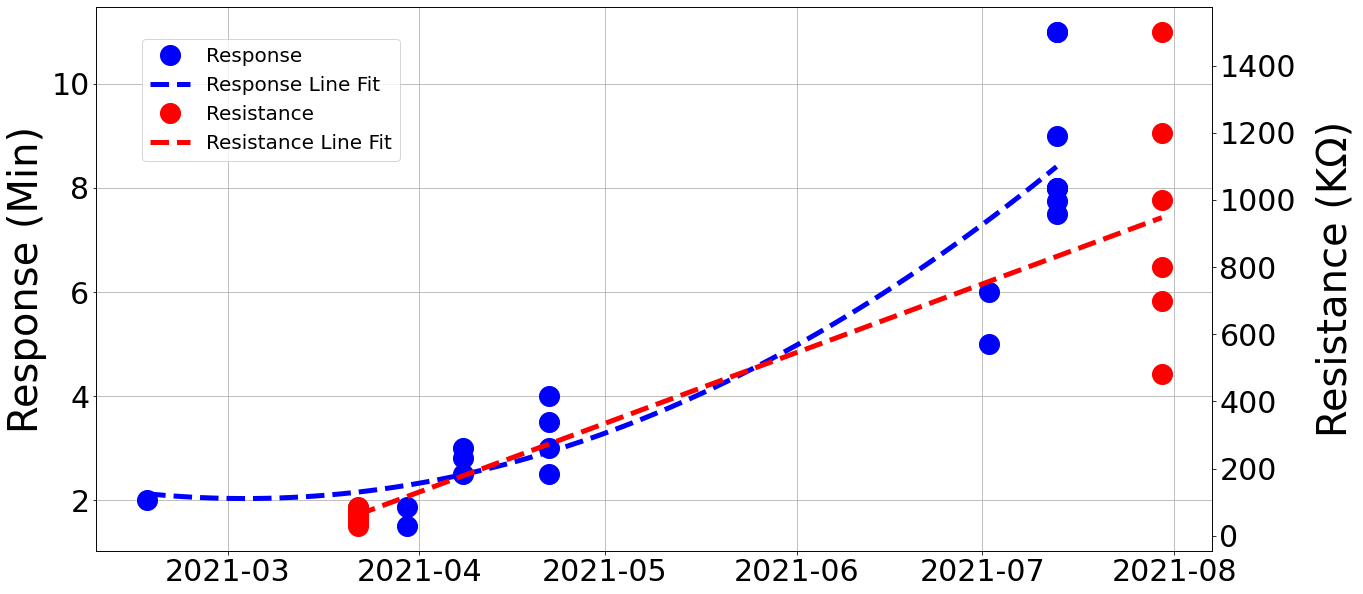

In [41]:
fig, ax1 = plt.subplots(figsize = (20,10))
ax2 = ax1.twinx()
ax1.grid()
ax1.plot(dates,response_time,'ob', label = 'Response', markersize = 20)
ax1.plot(dates_line, p4(xx),'--b', label = 'Response Line Fit', linewidth = 5)
ax2.plot(R_dates,Sensor_Resistances,'or', label = 'Resistance', markersize = 20)
ax2.plot(R_dates_line, R_p4(xx_R),'--r', label = 'Resistance Line Fit', linewidth = 5)
#ax1.set_title('Sensor Response Rate Over Time', fontsize = 40, fontweight ='bold')
ax1.set_ylabel('Response (Min)',fontsize = 40)
ax1.tick_params( labelsize=30)
ax2.set_ylabel('Resistance (K\u03A9)',fontsize = 40, labelpad = 20)
ax2.tick_params( labelsize=30)
ax2.set_xlabel('Date',fontsize = 40)
fig.legend(loc='upper left', bbox_to_anchor=(.15, .85), fontsize = 20)